In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('nobel_laureates_data.csv')
df.drop(columns=['died','diedCountry','diedCity'], inplace=True)
df.head(25)

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,Qazvin International University,Iran,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,University of Bergen,Norway,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,Nanocrystals Technology Inc.,USA,New York NY
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,1030,Louis Brus,male,1943-00-00,USA,Cleveland OH,Columbia University,USA,New York NY
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,1029,Moungi Bawendi,male,1961-00-00,France,Paris,Massachusetts Institute of Technology (MIT),USA,Cambridge MA
7,2023,physics,for experimental methods that generate attosec...,3,1028,Anne L Huillier,female,16-08-1958,France,Paris,Lund University,Sweden,Lund
8,2023,physics,for experimental methods that generate attosec...,3,1027,Ferenc Krausz,male,17-05-1962,Hungary,Mor,Max Planck Institute of Quantum Optics,Germany,Garching
9,2023,physics,for experimental methods that generate attosec...,3,1026,Pierre Agostini,male,23-07-1941,Tunisia,Tunis,The Ohio State University,USA,Columbus OH


In [4]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 1000 rows and 13 columns.


In [5]:
df.isnull().mean()*100

year                    0.0
category                0.0
motivation              0.0
prizeShare              0.0
laureateID              0.0
fullName                0.0
gender                  0.0
born                    0.0
bornCountry             3.0
bornCity                3.4
organizationName       23.7
organizationCountry    24.0
organizationCity       26.9
dtype: float64

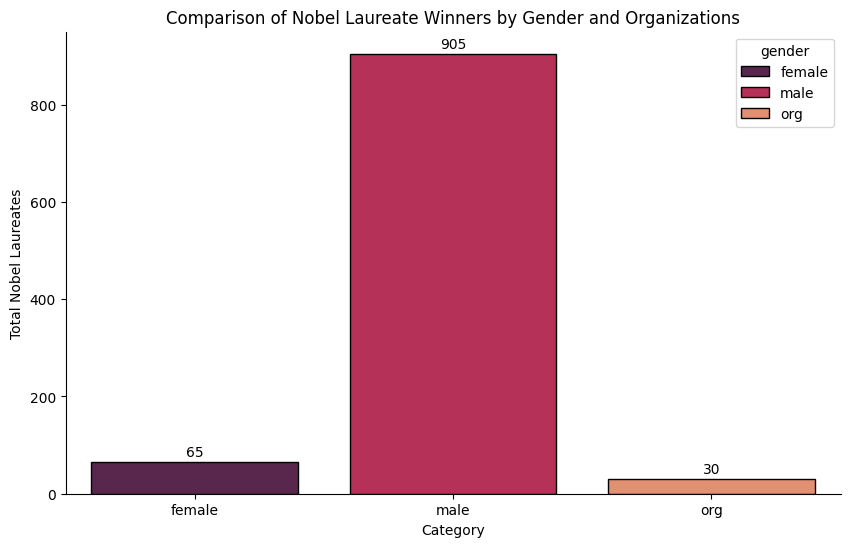

In [63]:
gender = df.groupby('gender').size().reset_index(name='total')

plt.figure(figsize=(10, 6))

sns.barplot(data=gender, x= 'gender', y='total', palette="rocket", hue='gender',edgecolor='black', legend=True)
plt.title('Comparison of Nobel Laureate Winners by Gender and Organizations')
plt.ylabel('Total Nobel Laureates')
plt.xlabel('Category')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 7), 
                    textcoords = 'offset points')


plt.show()

### The males make up for 90% of the Nobel Laureate wins since 1901, while the females make up less than 1% of total wins.